In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

### Overview:
Linear regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the features and the target.

### Key concepts:
- Ordinary Least Squares (OLS)
- Gradient descent optimization
- R-squared and adjusted R-squared
- Multicollinearity
- Assumptions: linearity, independence, homoscedasticity, normality of residuals
- Cost function (Mean Squared Error)


### Assumptions - acronym LINE:
- **(L) Linearity**: The relationship between the independent variables (features) and the dependent variable (target) should be linear. This can be checked by plotting the residuals against the predicted values.
- **(I) Independence**: The observations should be independent of each other. This is typically ensured by the data collection process.
- **(N) Normality of residuals**: The residuals should be normally distributed. This can be checked using a Q-Q plot or statistical tests like the Shapiro-Wilk test.
- **(E) - Equal variance - Homoscedasticity**: The variance of the residuals should be constant across all levels of the independent variables. This can be checked by plotting the residuals against the predicted values.

- **No multicollinearity**: The independent variables should not be highly correlated with each other. This can be checked using the Variance Inflation Factor (VIF).
- **No outliers**: Extreme values can have a significant impact on the regression line. These can be identified using scatter plots or statistical methods like Cook's distance.
- **Large sample size**: The sample size should be large enough to ensure the reliability of the estimates.

## GRADIENT DESCENT WAY
$$y = Xw + b$$
- $y$ shape $(m, )$
- $X$ shape $(m, n)$
- $w$ shape $(n, )$
- $b$ is constant, we keep shape $(m, )$ - broadcasting

**Recommened Reads**
![mse-1.png](attachment:images/mse-1.png)
![mse-2.png](attachment:mse-2.png)

### Cost Function (MSE):

$$L(w,b) = (1/2m) * Σ(y_{pred} - y)^2$$
$$L(w,b) = (1/2m) * Σ(Xw+b - y)^2$$
- $m$ is the number of samples

----

### Gradients 

**Start with $L$ for a single sample** 
$$L(w,b) = (1/2) * (Xw + b - y)^2$$

Then,
$$∂L/∂w = (Xw + b - y) * x$$  
$$∂L/∂w = (y_{pred} - y) * x$$  
where $x$ is that one sample

**Now, for all samples, we take the mean (EVIDENT FROM $L$'s definition!!)**

$\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^m [(y_{pred_i} - y_i) \cdot x_i]$

$\frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_{pred_i} - y_i)$

In vector notation:

$\frac{\partial L}{\partial w} = \frac{1}{m} X^T (\hat{y} - y)$

$\frac{\partial L}{\partial b} = \frac{1}{m} \sum (\hat{y} - y)$



---

### Simple explanation
- $X$ is a matrix of shape $(m, n)$
- $y_{pred}$ and $y$ are vectors of shape $(m,)$.
- The operation $X^T \cdot (y_{pred} - y)$ implicitly performs the summation for $\frac{\partial L}{\partial w}$.

---

$$∂L/∂w = (1/m) * X^T * (y_{pred} - y)$$ 
$$∂L/∂b = (1/m) * Σ(y_{pred} - y)$$

Update rule:
$$w = w - α * ∂L/∂w$$
$$b = b - α * ∂L/∂b$$
- $α$ is the learning rate

---


### Implementation:

In [37]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=10):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            # print(y_pred.shape) # (100,) i.e. all preds at a time

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [38]:
# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 3)
# y = 2 + 3 * X + np.random.randn(100, 3) * 0.1
y = 2 + 3 * X[:, 0] + 1.5 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100) * 0.1


print(f"X shape = {X.shape}, y shape = {y.shape}")

X shape = (100, 3), y shape = (100,)


In [39]:
X

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276],
       [0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985],
       [0.77815675, 0.87001215, 0.97861834],
       [0.79915856, 0.46147936, 0.78052918],
       [0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194],
       [0.26455561, 0.77423369, 0.45615033],
       [0.56843395, 0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  , 0.94374808],
       [0.6818203 , 0.3595079 , 0.43703195],
       [0.6976312 , 0.06022547, 0.66676672],
       [0.67063787, 0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677],
       [0.43860151, 0.98837384, 0.10204481],
       [0.20887676, 0.16130952, 0.65310833],
       [0.2532916 , 0.46631077, 0.24442559],
       [0.15896958, 0.11037514, 0.65632959],
       [0.13818295, 0.19658236, 0.36872517],
       [0.

In [40]:
y

array([3.52934846, 3.00156163, 2.66336401, 3.2563301 , 4.80805043,
       0.57714382, 3.62796564, 3.57024139, 2.91237999, 4.86557516,
       3.19216516, 2.29121705, 2.91681788, 3.77834964, 2.78595466,
       4.02990767, 2.33816961, 4.56449659, 1.5314766 , 2.8028894 ,
       1.44504544, 2.07993391, 2.85140536, 2.66903959, 4.41113087,
       2.2438019 , 2.44474113, 1.92213315, 3.12054637, 1.35662379,
       3.62066696, 4.07837163, 1.97352623, 2.55183323, 5.03247267,
       3.42134945, 3.14448625, 4.9883143 , 3.0803177 , 3.70023634,
       3.06797125, 3.36380895, 1.15850613, 2.94945858, 1.75382049,
       3.05044524, 3.0059355 , 2.01164562, 5.20872021, 3.79302044,
       3.47492231, 2.32478181, 4.25817294, 2.55300807, 3.50364321,
       3.9670423 , 3.33613801, 2.57960287, 4.05491115, 5.83807201,
       2.16731756, 3.00818208, 3.10050113, 3.2436637 , 2.43322726,
       3.25568269, 2.43251233, 4.19044929, 0.80253012, 2.4863059 ,
       3.97997841, 1.36248169, 2.31866816, 3.72832241, 3.51577

In [41]:
# Create and train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

In [30]:
model.bias, model.weights

(np.float64(1.7952615933534417),
 array([ 1.96723339,  1.35875792, -0.51795697]))

In [28]:
# Make predictions
X_test = np.array([0,1,2])
X_test


array([0, 1, 2])

In [29]:
y_pred = model.predict(X_test)
y_pred

np.float64(2.1181055745605137)

In [ ]:
# Plot the results
plt.scatter(X, y, color="b", label="Data")
plt.plot(X_test, y_pred, color="r", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Print the learned parameters
print(f"Learned weights: {model.weights}")
print(f"Learned bias: {model.bias}")

## OLS implementation
Uses the normal equation to directly compute the optimal parameters without iterative optimization. The formula for the OLS solution is:
$$Xβ = y$$
$$X^T X  β = X^T y$$
$$β = (X^T X)^{-1} X^T y$$

- $β$ is the vector of parameters (including the bias term)
- $X$ is the design matrix (with a column of ones added for the bias term)
- $y$ is the target vector

The **OLS method is faster for small to medium-sized datasets and provides an exact solution**. However, **for large datasets or when the number of features is very high, gradient descent might be preferred** due to its lower computational complexity.

X_with_bias shape = (100, 2)
X_with_bias few values = [[1.         0.5488135 ]
 [1.         0.71518937]
 [1.         0.60276338]
 [1.         0.54488318]
 [1.         0.4236548 ]]
params shape = (2, 1)
params few values = [[2.02221511]
 [2.9936935 ]]


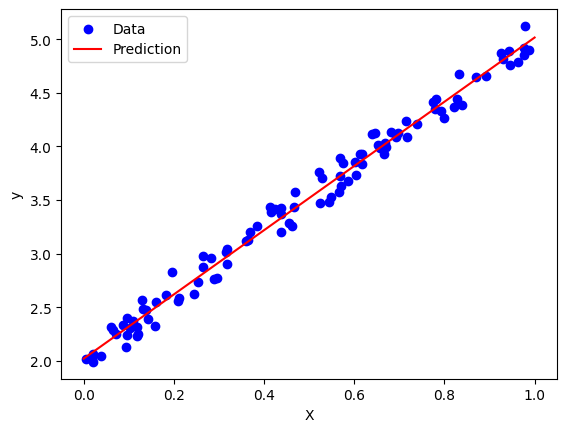

Learned weights: [2.9936935]
Learned bias: 2.022215107744724


In [22]:
class LinearRegressionOLS:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Add a column of ones to X for the bias term
        X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
        print(f"X_with_bias shape = {X_with_bias.shape}")
        print(f"X_with_bias few values = {X_with_bias[:5]}")

        # Calculate the parameters using the normal equation
        params = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
        print(f"params shape = {params.shape}")
        print(f"params few values = {params[:5]}")

        self.bias = params[0]
        self.weights = params[1:]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1) * 0.1

# Create and train the model
model = LinearRegressionOLS()
model.fit(X, y)

# Make predictions
X_test = np.array([[0], [1]])
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X, y, color="b", label="Data")
plt.plot(X_test, y_pred, color="r", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Print the learned parameters
print(f"Learned weights: {model.weights.flatten()}")
print(f"Learned bias: {model.bias[0]}")
